In [35]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import altair as alt
alt.renderers.enable('altair_viewer')
import warnings
warnings.filterwarnings('ignore')

In [36]:
# load data traning
data_path = 'C:/Users/ASUS/TA01/00_data/dataset_raw.csv'
data = pd.read_csv(data_path, sep=';')

# preview first 5 rows
data

,keluhan,bagian
0,Dear BAA Mohon di bantu untuk merubah status a...,BAA
1,"Dear BAA Telkom University,\nSaya sebagai sala...",BAA
2,Mohon maaf saya haidar mau komplain pada saat ...,BAA
3,"permisi saya mau komplain, biaya pendidikan sa...",BAA
4,"""Assalamualaikum wr wb.Maaf pak, saya sudah me...",BAA
...,...,...
788,"Assalamualaikum Wr. Wb Mohon maaf sebelumnya, ...",LABORAN
789,gaji asisten untuk FRI tidak sebanding (jika d...,LABORAN
790,"Selamat siang, maaf mangganggu. Saya Yusrin da...",LABORAN
791,"maaf sebelumnya, saya olyvia fransiska dari te...",LABORAN


In [37]:
# Jumlah keluhan di setiap bagian

bars = alt.Chart(data).mark_bar(size=65).encode(
    x=alt.X('bagian'),
    y=alt.Y('count():Q', axis=alt.Axis(title='Jumlah Keluhan ')),
    tooltip=[alt.Tooltip('count()', title='Jumlah Keluhan'), 'bagian'],
    color='bagian'
    )

text = bars.mark_text(
    align='center',
    baseline='bottom',
    ).encode(
        text='count()'
        )
        
chart = (bars + text).interactive().properties(
    height=300, 
    width=700,
    title='Jumlah keluhan di setiap bagian'
    )

chart.show()

Displaying chart at http://localhost:15230/


In [38]:
# Persentase jumlah keluhan di setiap bagian

data['id'] = 1
data_count = pd.DataFrame(data.groupby('bagian').count()['id']).reset_index()

bars = alt.Chart(data_count).mark_bar(size=65).encode(
    x=alt.X('bagian'),
    y=alt.Y('PercentOfTotal:Q', axis=alt.Axis(format='.0%', title='Persentase Keluhan')),
    color='bagian'
    ).transform_window(
        TotalArticles='sum(id)',
        frame=[None, None]
        ).transform_calculate(
            PercentOfTotal='datum.id / datum.TotalArticles'
            )

text = bars.mark_text(
    align='center',
    baseline='bottom',
    ).encode(
        text=alt.Text('PercentOfTotal:Q', format='.1%')
        )

chart = (bars + text).interactive().properties(
    height=300, 
    width=700,
    title = 'Persentase jumlah keluhan di setiap bagian'
    )

chart.show()

Displaying chart at http://localhost:15230/


Text(0.5, 1.0, 'keluhan length distribution')

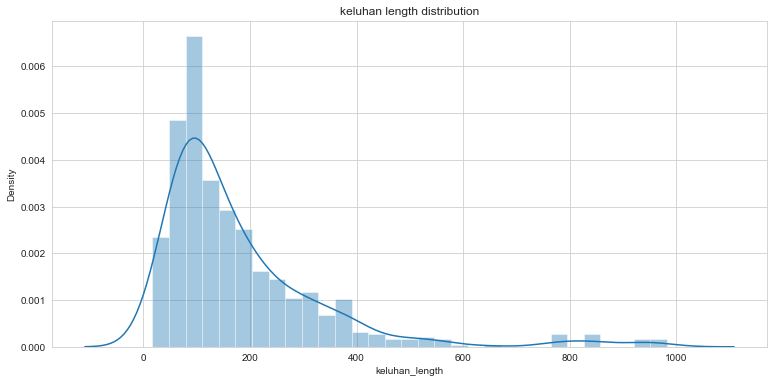

In [39]:
data['keluhan_length'] = data['keluhan'].str.len()

plt.figure(figsize=(12.8,6))
sns.distplot(data['keluhan_length']).set_title('keluhan length distribution')

Text(0.5, 1.0, 'News length distribution')

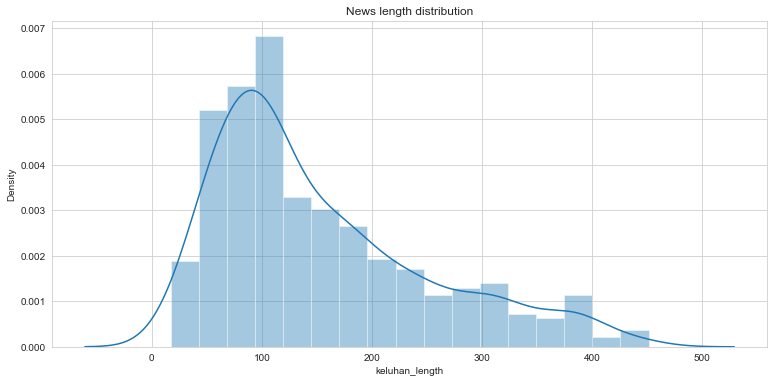

In [40]:
quantile = data['keluhan_length'].quantile(0.95)
data_quantile = data[data['keluhan_length'] < quantile]

plt.figure(figsize=(12.8,6))
sns.distplot(data_quantile['keluhan_length']).set_title('News length distribution')

<AxesSubplot:xlabel='bagian', ylabel='keluhan_length'>

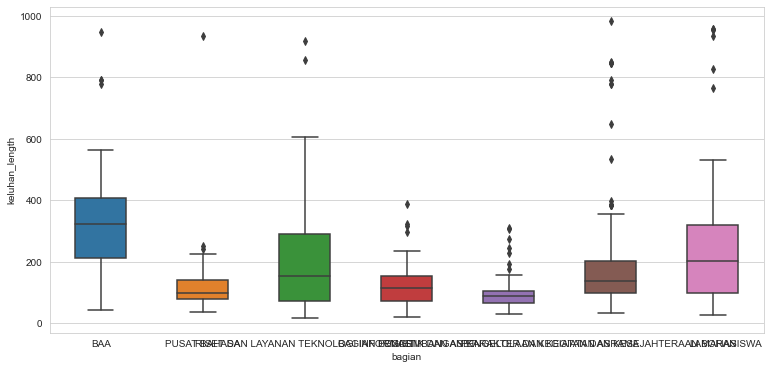

In [41]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=data, x='bagian', y='keluhan_length', width=.5)

<AxesSubplot:xlabel='bagian', ylabel='keluhan_length'>

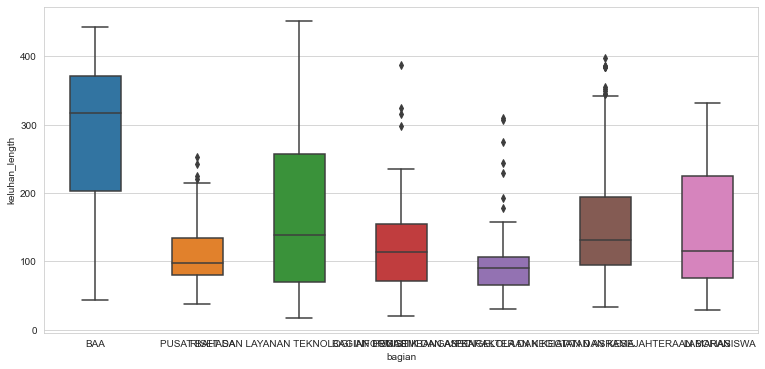

In [42]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=data_quantile, x='bagian', y='keluhan_length', width=.5)

In [44]:
with open('01_pickle/01_data_training.pickle', 'wb') as output:
    pickle.dump(data, output)